# Airline Startup Project

In this notebook, we are going to explore the accident/incident of Aviation Data to analyze the risk of the top 4 plane manufacturers. The plane we recommend will be based on the amount of accident/incident, amount of fatal injuries, and amount of fatal injuries over time.

For our first step, we imported the packages needed for our analysis and visualization, loaded the file to be read into a DataFrame, and check to see the data.

In [7]:
# Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Load Data

dtypes = {'column_name_6':'int64', 'column_name_7':'float64', 'column_name_8':'float64'}

aviation = pd.read_csv('Data/AviationData.csv', encoding='ISO-8859-1', dtype=dtypes, parse_dates=['Event.Date'], low_memory=False)
pd.options.mode.chained_assignment = None


In [9]:
# View DataFrame

aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

## Filtering the Data

We made a copy of the original date. We added a new column "Year" to our data from which we can filter the year to between 2002-2022. We also filtered the data to include only the United States.

In [10]:
# Making a copy of existing Dataframe to work on

aviation_cleaned = aviation.copy()

In [11]:
# Stack Overflow code to pull only the Year out of Event.Date

aviation_cleaned["Year"] = pd.DatetimeIndex(aviation_cleaned["Event.Date"]).year

In [12]:
# Removing all years prior to 2002 when the Aviation and Transportation Security Act went into effect

aviation_cleaned = aviation_cleaned[(aviation_cleaned["Year"] >= 2002) & (aviation_cleaned["Country"] == "United States")]

# Confirming data filtering

aviation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31865 entries, 51958 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                31865 non-null  object        
 1   Investigation.Type      31865 non-null  object        
 2   Accident.Number         31865 non-null  object        
 3   Event.Date              31865 non-null  datetime64[ns]
 4   Location                31858 non-null  object        
 5   Country                 31865 non-null  object        
 6   Latitude                31266 non-null  object        
 7   Longitude               31256 non-null  object        
 8   Airport.Code            21667 non-null  object        
 9   Airport.Name            21849 non-null  object        
 10  Injury.Severity         31757 non-null  object        
 11  Aircraft.damage         31001 non-null  object        
 12  Aircraft.Category       24374 non-null  ob

## Data Cleaning

### Deleting Missing Values

Based on the amount of data we have after initial analysis, we determined that null or unknown values should be omitted from further analysis.

In [13]:
# Filling Nulls in the Make column so we can manipulate it more easily

aviation_cleaned["Make"].fillna("other", inplace = True)

# Filling null values with 0 in Total.Fatal.Injuries column 

aviation_cleaned["Total.Fatal.Injuries"].fillna(0, inplace = True)

In [14]:
# Check that the Nulls are filled

aviation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31865 entries, 51958 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                31865 non-null  object        
 1   Investigation.Type      31865 non-null  object        
 2   Accident.Number         31865 non-null  object        
 3   Event.Date              31865 non-null  datetime64[ns]
 4   Location                31858 non-null  object        
 5   Country                 31865 non-null  object        
 6   Latitude                31266 non-null  object        
 7   Longitude               31256 non-null  object        
 8   Airport.Code            21667 non-null  object        
 9   Airport.Name            21849 non-null  object        
 10  Injury.Severity         31757 non-null  object        
 11  Aircraft.damage         31001 non-null  object        
 12  Aircraft.Category       24374 non-null  ob

### Cleaning the 'Make' Column

We cleaned the "Make" column that include the top 4 airplane manufacturers.

In [15]:
# Changing all the Make column into lowercase strings for ease of manipulation and analysis

aviation_cleaned["Make"] = aviation_cleaned["Make"].str.lower()

# Eliminating periods from the column observations

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('.', '', regex=False)

# Cleaning Data

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft corp', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker-beechcraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft co', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beech', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker-beechcraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft corp', 'beechcraft', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing stearman', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing-stearman', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing (stearman)', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing company', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing company, long beach div', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('the boeing company', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing-vertol', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing 777-306er', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing commercial airplane gro', 'boeing', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('airbus industrie', 'airbus', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('airbus industries', 'airbus', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier aerospace, inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('learjet', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('learjet inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier, inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier learjet corp', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('gates learjet', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('gates learjet corporation', 'bombardier', regex=False)


In [16]:
# Asserting that the column 'Make' is cleaned

aviation_cleaned['Make'].value_counts()

cessna                8391
piper                 4753
beechcraft            1771
bell                   794
boeing                 581
                      ... 
polsgrove                1
ratte james              1
brown joseph             1
forbes                   1
rolladen schneider       1
Name: Make, Length: 4648, dtype: int64

We want to filter the data down to only show the data points involving the top 4 airplane manufacturers.

In [17]:
# Creating a new Dataframe containing only the top four

top_four = aviation_cleaned.loc[(aviation_cleaned["Make"].isin(["boeing", "airbus", "bombardier", "beechcraft"]))]

In [18]:
# Asserting that the new DataFrame 'top_four' contains only the Top 4 Manufacturers

incident_counts = top_four["Make"].value_counts()
incident_counts

beechcraft    1771
boeing         581
airbus         173
bombardier     163
Name: Make, dtype: int64

## Visualizing the Data

In this section, we started our analysis of the plane manufacturers and type of engine to choose for our first airplane to purchase.

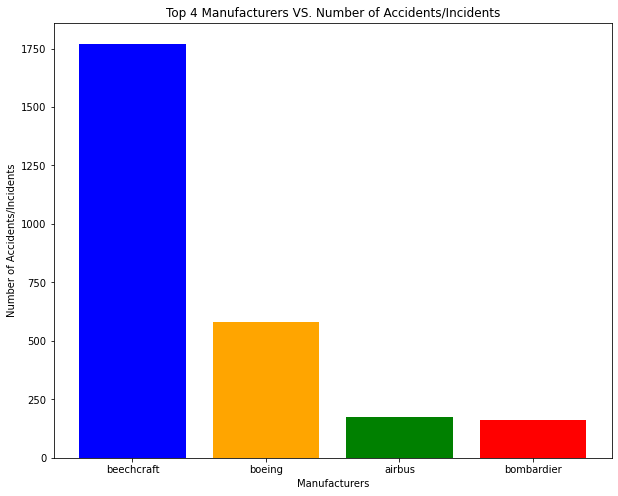

In [19]:
# Visualizing the Top 4 Manufacturers vs Number of Accident/Incidents

top_manufacturers = incident_counts.index
number_of_accidents = incident_counts.values

fig, ax = plt.subplots(figsize=(10, 8))

color_ax_graph1 = ['blue', 'orange', 'green', 'red']

ax.bar(top_manufacturers, number_of_accidents, color=color_ax_graph1)

ax.set_title('Top 4 Manufacturers VS. Number of Accidents/Incidents')
ax.set_xlabel('Manufacturers')
ax.set_ylabel('Number of Accidents/Incidents');

In [20]:
# Number of Fatal Injuries for Top 4 Manufacturers

beechcraft_fatal_injuries = top_four.loc[top_four['Make'] == 'beechcraft', ['Total.Fatal.Injuries']].sum()
boeing_fatal_injuries = top_four.loc[top_four['Make'] == 'boeing', ['Total.Fatal.Injuries']].sum()
airbus_fatal_injuries = top_four.loc[top_four['Make'] == 'airbus', ['Total.Fatal.Injuries']].sum()
bombardier_fatal_injuries = top_four.loc[top_four['Make'] == 'bombardier', ['Total.Fatal.Injuries']].sum()

top_four.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
51961,20020104X00037,Accident,SEA02FA023,2002-01-02,"BOISE, ID",United States,NaN,NaN,BOI,Boise Air Terminal (Gowen Fld),...,NaN,0.0,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,04-11-2002,2002
51962,20020110X00051,Accident,ATL02LA029,2002-01-02,"GREENVILLE, SC",United States,34.885833,-82.2175,GSP,Greer-Greenville Spartanburg,...,NaN,0.0,NaN,NaN,3.0,IMC,Taxi,Probable Cause,25-07-2002,2002
51965,20020110X00056,Incident,FTW02IA061,2002-01-03,"Houston, TX",United States,29.980278,-95.339722,IAH,Bush Intercontinental Airport,...,NaN,0.0,NaN,NaN,3.0,VMC,Taxi,Probable Cause,24-01-2005,2002
51972,20020108X00047,Accident,FTW02FA062,2002-01-05,"Oak Grove, LA",United States,32.963611,-91.418056,27A7,Costello,...,NaN,1.0,NaN,NaN,NaN,IMC,Maneuvering,Probable Cause,01-04-2003,2002
51977,20020110X00059,Accident,CHI02LA051,2002-01-06,"Angola, IN",United States,41.635555,-85.094444,ANQ,Tri-State Stuben County,...,NaN,0.0,NaN,NaN,3.0,VMC,Approach,Probable Cause,06-12-2002,2002


In [21]:
# Making a GroupBy DataFrame comparing total number of injuries for 4 manufacturers over time

top_four['Total.Injuries'] = top_four['Total.Serious.Injuries'] + top_four['Total.Minor.Injuries']
top_four_groupby = top_four.groupby(['Make']).sum('Total.Injuries')
top_four_groupby

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total.Injuries
Make,,,,,,,
airbus,296.0,10.0,100.0,126.0,21429.0,348165,217.0
beechcraft,2318.0,1015.0,405.0,345.0,2326.0,3561033,558.0
boeing,992.0,40.0,696.0,370.0,55237.0,1168292,993.0
bombardier,298.0,126.0,57.0,34.0,5569.0,327684,73.0


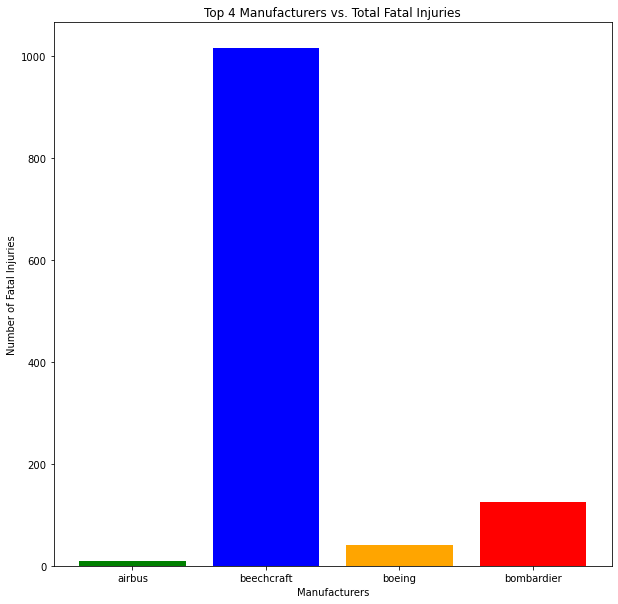

In [22]:
# Visualizing Top 4 Manufacturers vs. Total Fatal Injuries

top_four_fatal_series = top_four_groupby['Total.Fatal.Injuries']

fig, ax = plt.subplots(figsize=(10, 10))

color_ax_graph2 = ['green', 'blue', 'orange', 'red']

ax.bar(top_four_fatal_series.index, top_four_fatal_series.values, color=color_ax_graph2)

ax.set_title('Top 4 Manufacturers vs. Total Fatal Injuries')
ax.set_xlabel('Manufacturers')
ax.set_ylabel("Number of Fatal Injuries");

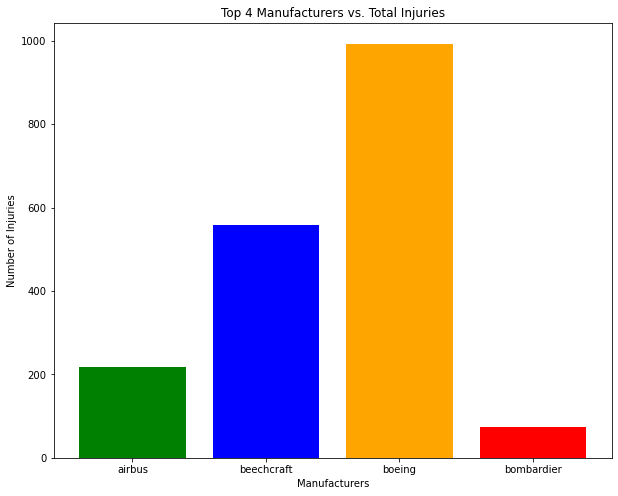

In [23]:
# Visualizing Top 4 Manufacturers vs. Total Injuries

top_four_injuries_series = top_four_groupby['Total.Injuries']

fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(top_four_injuries_series.index, top_four_injuries_series.values, color=color_ax_graph2)

ax.set_title('Top 4 Manufacturers vs. Total Injuries')
ax.set_xlabel('Manufacturers')
ax.set_ylabel('Number of Injuries');

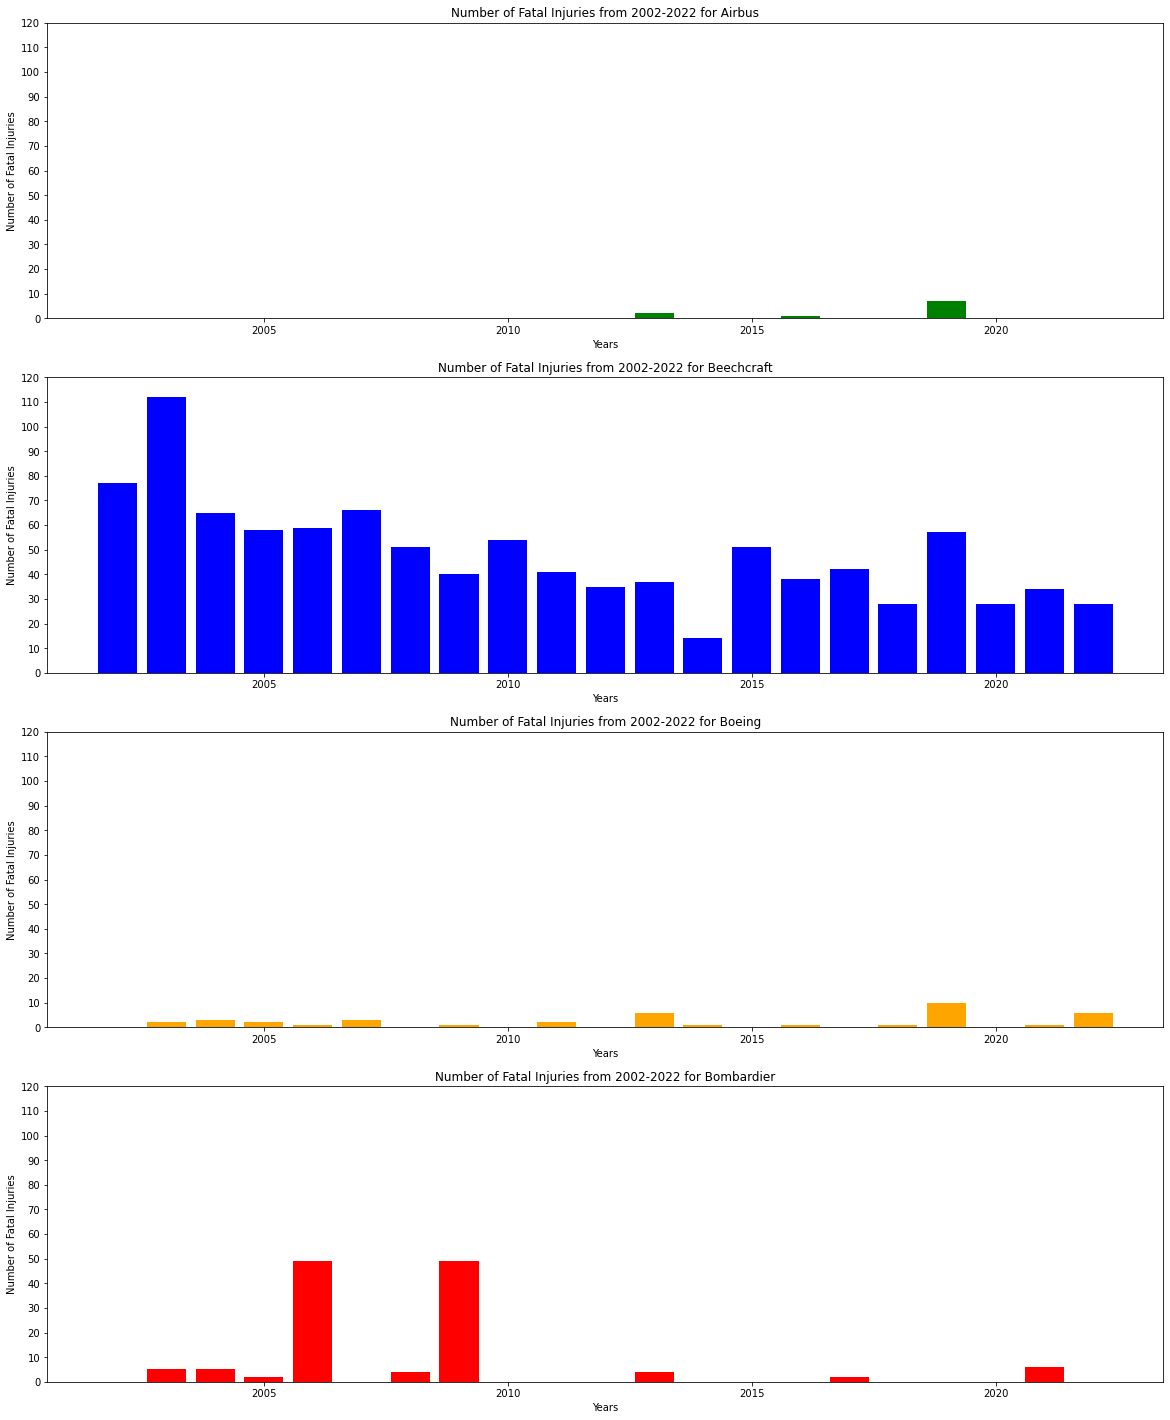

In [24]:
# Visualizing Number of Fatal Injuries from 2002-2022 for each Top 4 Manufacturers

top_four_groupby_year = top_four.groupby(['Make', 'Year']).sum('Total.Injuries')

top_four_year_series_airbus = top_four_groupby_year.iloc[:21]
top_four_year_series_beechcraft = top_four_groupby_year.iloc[21:42]
top_four_year_series_boeing = top_four_groupby_year.iloc[42:63]
top_four_year_series_bombardier = top_four_groupby_year.iloc[63:]

top_four_year_series_airbus.reset_index(inplace=True)
top_four_year_series_beechcraft.reset_index(inplace=True)
top_four_year_series_boeing.reset_index(inplace=True)
top_four_year_series_bombardier.reset_index(inplace=True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20, 25))

ax1.bar(top_four_year_series_airbus['Year'], top_four_year_series_airbus['Total.Fatal.Injuries'], color=['green'])

ax1.set_title('Number of Fatal Injuries from 2002-2022 for Airbus')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Fatal Injuries')
ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])


ax2.bar(top_four_year_series_beechcraft['Year'], top_four_year_series_beechcraft['Total.Fatal.Injuries'], color=['blue'])

ax2.set_title('Number of Fatal Injuries from 2002-2022 for Beechcraft')
ax2.set_xlabel('Years')
ax2.set_ylabel('Number of Fatal Injuries')
ax2.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])

ax3.bar(top_four_year_series_boeing['Year'], top_four_year_series_boeing['Total.Fatal.Injuries'], color=['orange'])

ax3.set_title('Number of Fatal Injuries from 2002-2022 for Boeing')
ax3.set_xlabel('Years')
ax3.set_ylabel('Number of Fatal Injuries')
ax3.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])

ax4.bar(top_four_year_series_bombardier['Year'], top_four_year_series_bombardier['Total.Fatal.Injuries'], color=['red'])

ax4.set_title('Number of Fatal Injuries from 2002-2022 for Bombardier')
ax4.set_xlabel('Years')
ax4.set_ylabel('Number of Fatal Injuries')
ax4.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]);

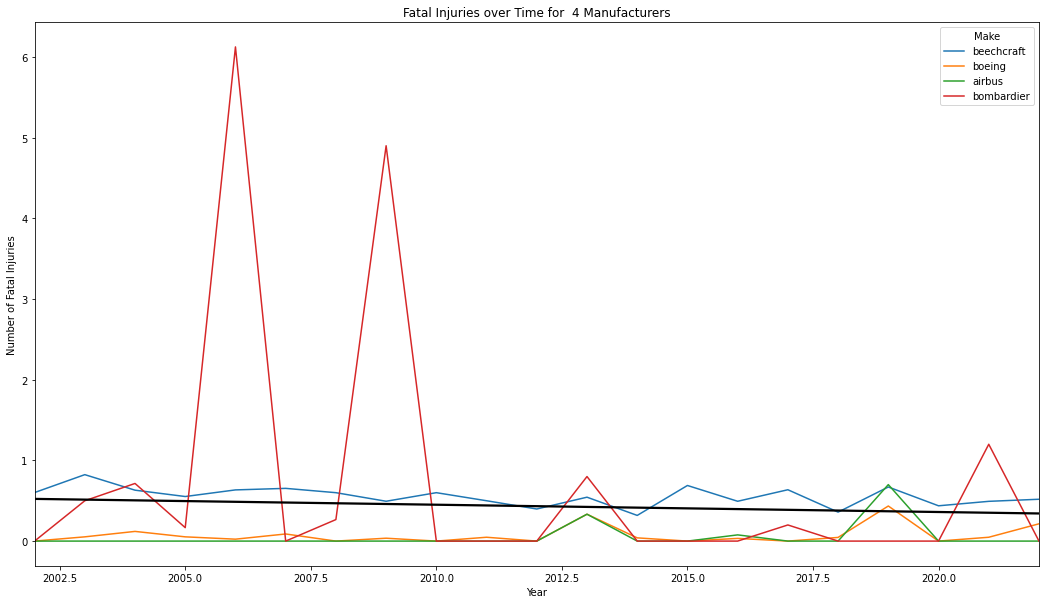

In [26]:
# Another View: Comparing total number of injuries for 4 manufacturers over time
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

sns.lineplot(x='Year', y='Total.Fatal.Injuries', hue='Make', data = top_four, ci = None, ax=ax)
sns.regplot(x='Year', y='Total.Fatal.Injuries', data = top_four, ci = None, scatter = False, color = 'black', ax=ax)
plt.title('Fatal Injuries over Time for  4 Manufacturers')
plt.xlabel('Year')
#plt.ylim(0,10)
plt.ylabel('Number of Fatal Injuries')
plt.show()

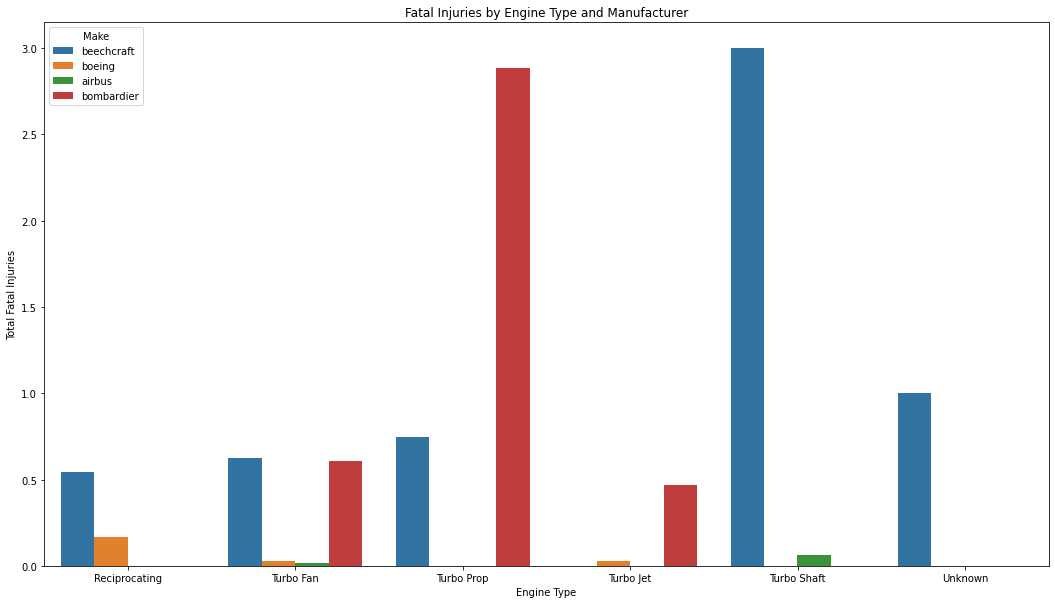

In [27]:
# Visualizing the Number of Fatal Injuries of each Engine Type and Top 4 Manufacturers

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

sns.barplot(x='Engine.Type', y='Total.Fatal.Injuries', hue='Make', data = top_four, ci = None, ax=ax)
plt.title('Fatal Injuries by Engine Type and Manufacturer')
plt.xlabel('Engine Type')
#plt.ylim(0,10)
plt.ylabel('Total Fatal Injuries')
plt.show()

# Conclusion

- **Airbus should be the Manufacturer picked for our first airplane.** 
Our analysis showed that Airbus is responsible for among the least amount of accidents and incidents in the past 20 years compared to Boeing and Beechcraft.
- **Since we are recommending Airbus, we also recommend picking commercial flights to be our first business of choice.**
- **The engine picked should be either Turbo Jet.** Our analysis indicates that Airbus airplanes with Turbo Jet engine are responsible for zero fatalities.